In [5]:
pip install mediapipe opencv-python

Note: you may need to restart the kernel to use updated packages.


In [8]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import time

In [14]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

mp_holistic.POSE_CONNECTIONS
mp_drawing.DrawingSpec(color=(0,0,255), thickness=2, circle_radius=2)
mp_drawing.draw_landmarks

<function mediapipe.python.solutions.drawing_utils.draw_landmarks(image: numpy.ndarray, landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList, connections: Optional[List[Tuple[int, int]]] = None, landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2), connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2), is_drawing_landmarks: bool = True)>

In [18]:
# Setup variabls
face_data = []
hand_left_x = []
hand_left_y = []
hand_left_z = []
hand_right = []
time_capture = []

face_time = []
hand_left_time = []

startTime = time.time()

cap = cv2.VideoCapture(1)

In [19]:

# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        
        
        # 5. Save data        
        # Extract specific landmarks 
        if results.face_landmarks:
            for landmark in results.face_landmarks.landmark: 
                x = landmark.x
                y = landmark.y
                z = landmark.z

                # Example: Get the right eyebrow (you'll need to look up the index of the right eyebrow landmark in MediaPipe's documentation)
                righHighBrowIndex = 105
                right_eyebrow_x = results.face_landmarks.landmark[righHighBrowIndex].x
                right_eyebrow_y = results.face_landmarks.landmark[righHighBrowIndex].y
                right_eyebrow_z = results.face_landmarks.landmark[righHighBrowIndex].z  

                # Do something with the landmark coordinates
                face_data.append(right_eyebrow_y)
        
        
                # Extract specific landmarks 
        if results.left_hand_landmarks:  # Check if the left hand is detected
            for landmark in results.left_hand_landmarks.landmark: 
                x = landmark.x
                y = landmark.y
                z = landmark.z

                # Example: Get the index fingertip
                index_tip_x = results.left_hand_landmarks.landmark[mp_holistic.HandLandmark.INDEX_FINGER_TIP].x
                index_tip_y = results.left_hand_landmarks.landmark[mp_holistic.HandLandmark.INDEX_FINGER_TIP].y
                index_tip_z = results.left_hand_landmarks.landmark[mp_holistic.HandLandmark.INDEX_FINGER_TIP].z  
                
                # Do something with the landmark coordinates
                hand_left_x.append(index_tip_x)
                hand_left_y.append(index_tip_y)
                hand_left_time.append(time.time() - startTime) 
        
        time_capture.append(time.time() - startTime) 

            
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


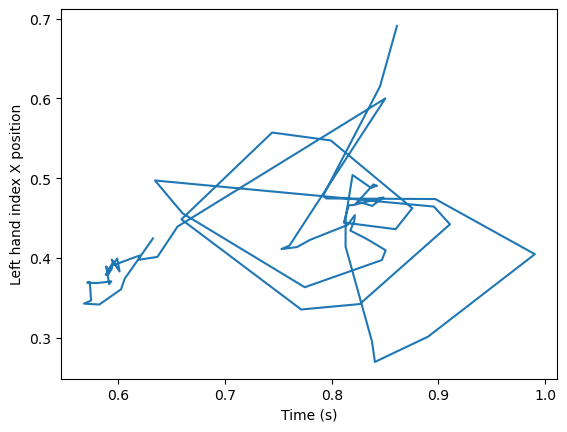

In [17]:
# data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
# pd.DataFrame.from_dict(data)

plt.figure()
plt.plot(hand_left_x, hand_left_y)
plt.xlabel('Time (s)')
plt.ylabel('Left hand index X position')

cap.release()
cv2.destroyAllWindows()
